## LAB 4: Forward and Backward Difference

**Date: 29-01-2024**

In [1]:
import numpy as np
from typing import *
import matplotlib.pyplot as plt

> To Calculate the Forward difference tables

In [2]:
def fwdDiff(x: List[int], y: List[int], as_dict: bool = False):
    assert len(x) == len(y) 
    table = np.zeros((len(x),len(x)+1))

    table[:,0] = x
    table[:,1] = y
    
    for i in range(2,len(x) + 1):
        table[:len(x)-i+1,i] = np.diff(table[:len(x)-i+2,i-1])
    if(as_dict):
        return dict(zip(["X","Y"] + [f"Y{i}" for i in range(len(x)-1)], table.T))
    return table

In [3]:
fwdDiff(list(range(40,81,10)),[31, 73, 124, 159, 190])

array([[ 40.,  31.,  42.,   9., -25.,  37.],
       [ 50.,  73.,  51., -16.,  12.,   0.],
       [ 60., 124.,  35.,  -4.,   0.,   0.],
       [ 70., 159.,  31.,   0.,   0.,   0.],
       [ 80., 190.,   0.,   0.,   0.,   0.]])

In [4]:
fwdDiff(list(range(40,81,10)),[31, 73, 124, 159, 190],as_dict=True)

{'X': array([40., 50., 60., 70., 80.]),
 'Y': array([ 31.,  73., 124., 159., 190.]),
 'Y0': array([42., 51., 35., 31.,  0.]),
 'Y1': array([  9., -16.,  -4.,   0.,   0.]),
 'Y2': array([-25.,  12.,   0.,   0.,   0.]),
 'Y3': array([37.,  0.,  0.,  0.,  0.])}

In [5]:
def bkDiff(x: List[int], y: List[int], as_dict: bool = False):
    assert len(x) == len(y) 
    table = np.zeros((len(x),len(x)+1))

    table[:,0] = x
    table[:,1] = y
    
    for i in range(2,len(x) + 1):
        table[i-1:,i] = np.diff(table[i-2:,i-1])
    if(as_dict):
        return dict(zip(["X","Y"] + [f"Y{i}" for i in range(len(x)-1)], table.T))
    return table

In [6]:
bkDiff(list(range(0,4,1)),[1, 2, 1, 10])

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  2.,  1.,  0.,  0.],
       [ 2.,  1., -1., -2.,  0.],
       [ 3., 10.,  9., 10., 12.]])

In [7]:
bkDiff(list(range(0,4,1)),[1, 2, 1, 10],as_dict=True)

{'X': array([0., 1., 2., 3.]),
 'Y': array([ 1.,  2.,  1., 10.]),
 'Y0': array([ 0.,  1., -1.,  9.]),
 'Y1': array([ 0.,  0., -2., 10.]),
 'Y2': array([ 0.,  0.,  0., 12.])}

In [8]:
def printTable(table: "ndarray"):
    headings = ["X","Y"] + [f"Y{i}" for i in range(len(table)-1)]
    print(headings)
    for row in table:
        print(row)

In [9]:
printTable(bkDiff(list(range(0,4,1)),[1, 2, 1, 10],as_dict=False))

['X', 'Y', 'Y0', 'Y1', 'Y2']
[0. 1. 0. 0. 0.]
[1. 2. 1. 0. 0.]
[ 2.  1. -1. -2.  0.]
[ 3. 10.  9. 10. 12.]


In [10]:
def plotDiff(table: dict):
    
    X,Y,*D = table.values()
    
    fig = plt.figure()
    plt.scatter(X,np.zeros_like(X))
    plt.plot(X,Y)
    for d in D:
        i = [i for i,x in enumerate(d) if x!=0]
        plt.plot(X[i],d[i], marker = '*')

    plt.legend(table.keys())
    plt.grid()
    plt.show()

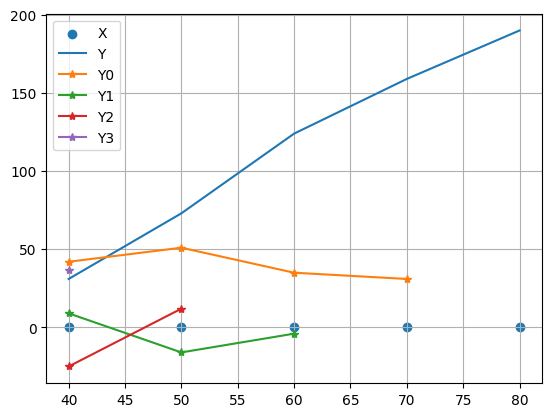

In [11]:
plotDiff(fwdDiff(list(range(40,81,10)),[31, 73, 124, 159, 190],as_dict=True))

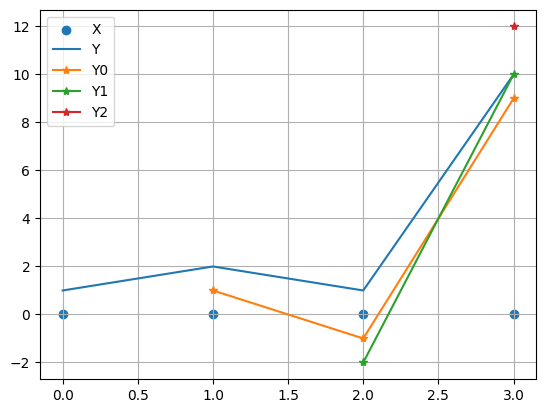

In [12]:
plotDiff(bkDiff(list(range(0,4,1)),[1, 2, 1, 10],as_dict=True))

## LAB 5: Interpolations

**Date: 30-01-2024**

In [14]:
import scipy.interpolate as interpolate

> **Lagrange's Interpolation**